In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
data=pd.read_csv("social_networks.csv")

In [5]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
del data["User ID"]

In [6]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
data.index

RangeIndex(start=0, stop=400, step=1)

In [22]:
l1=data.columns
for i in l1:
    print(i)

User ID
Gender
Age
EstimatedSalary
Purchased


In [11]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [14]:
data[20:25]

,Gender,Age,EstimatedSalary,Purchased
20,Male,45,22000,1
21,Female,47,49000,1
22,Male,48,41000,1
23,Female,45,22000,1
24,Male,46,23000,1


In [15]:
data["Age"][24]

46

In [16]:
data.Age[24]

46

In [17]:
data.loc[24,'Gender']

'Male'

In [19]:
data_new=data[['Age','EstimatedSalary']]
data_new.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [36]:
for i in range(0,data['Age'].count()):
    if(data.loc[i,'Gender']=='Male'):
        data.loc[i,'Gender']=1
    else:
        data.loc[i,'Gender']=0

In [42]:
data[1:50]

,Gender,Age,EstimatedSalary,Purchased
1,1,0.583333,0.133333,0
2,0,0.433333,0.286667,0
3,0,0.450000,0.380000,0
4,1,0.316667,0.506667,0
5,1,0.450000,0.386667,0
6,0,0.450000,0.560000,0
7,0,0.533333,1.000000,1
8,1,0.416667,0.220000,0
9,0,0.583333,0.433333,0
10,0,0.433333,0.533333,0


In [38]:
for i in range(0,data['Age'].count()):
    data.loc[i,'Age']=data.loc[i,'Age']/60

In [40]:
for i in range(0,data['EstimatedSalary'].count()):
    data.loc[i,'EstimatedSalary']=data.loc[i,'EstimatedSalary']/150000

In [29]:
plt.matshow(data.corr())

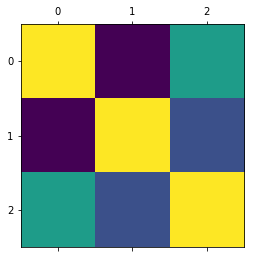

In [30]:
plt.show()

In [43]:
def sigmoid_fun(param):
    return 1/(1+(2.71**(-param)))

In [44]:
print(sigmoid_fun(1))

0.7304582210242588


In [85]:
def partial_difference_o0(o0,o1,o2):
    a,b,c,d=0,0,0,0
    for i in range(0,data['Age'].count()):
        temp1=sigmoid_fun(o0+(o1*data['Age'][i]+o2*data['EstimatedSalary'][i]))
        temp=temp1-data['Purchased'][i]
        a=a+temp
        b=b+temp*data['Age'][i]
        c=c+temp*data['EstimatedSalary'][i]
    #print(a,b,c)
    return [a/data['Age'].count(),b/data['Age'].count(),c/data['Age'].count()]

In [110]:
cur_o0=0
cur_o1=0
cur_o2=0
prev_o0=0
prev_o1=0
learning_rate=0.0001
for i in range(0,10000):
    if(i!=0 and abs(cur_o0-prev_o0)<0.00001):
        print(i)
        break
    arr=partial_difference_o0(cur_o0,cur_o1,cur_o2)
    a,b,c=arr[0],arr[1],arr[2]
    #print(arr)
    prev_o0=cur_o0
    prev_o1=cur_o1
    cur_o0=cur_o0-(learning_rate*a)
    cur_o1=cur_o1-(learning_rate*b)
    cur_o2=cur_o2-(learning_rate*c)
    print(cur_o0,cur_o1,cur_o2)

-1.425e-05 -3.7375e-06 -2.68583333333e-06
-2.8499555252e-05 -7.47471763549e-06 -5.37145585792e-06
-4.27486657739e-05 -1.1211652918e-05 -8.05686758243e-06
-5.69973315836e-05 -1.49483058589e-05 -1.07420685155e-05
-7.12455526991e-05 -1.86846764699e-05 -1.34270586658e-05
-8.54933291384e-05 -2.24207647624e-05 -1.6111838042e-05
-9.97406609194e-05 -2.6156570748e-05 -1.87964066527e-05
-0.00011398754806 -2.9892094438e-05 -2.14807645066e-05
-0.000128233990578 -3.36273358441e-05 -2.41649116124e-05
-0.000142479988492 -3.73622949777e-05 -2.68488479787e-05
-0.000156725541819 -4.10969718504e-05 -2.95325736141e-05
-0.000170970650577 -4.48313664736e-05 -3.22160885274e-05
-0.000185215314785 -4.85654788589e-05 -3.48993927271e-05
-0.00019945953446 -5.22993090178e-05 -3.75824862219e-05
-0.000213703309621 -5.60328569616e-05 -4.02653690205e-05
-0.000227946640284 -5.97661227021e-05 -4.29480411316e-05
-0.000242189526468 -6.34991062506e-05 -4.56305025637e-05
-0.000256431968192 -6.72318076187e-05 -4.83127533256e

-0.00211835589017 -0.000553780358164 -0.000397869460562
-0.00213253982022 -0.000557475912514 -0.000400523978678
-0.00214672330818 -0.000561171186209 -0.000403178287271
-0.00216090635408 -0.000564866179262 -0.000405832386351
-0.00217508895793 -0.000568560891682 -0.000408486275926
-0.00218927111976 -0.000572255323483 -0.000411139956004
-0.00220345283957 -0.000575949474675 -0.000413793426594
-0.00221763411739 -0.00057964334527 -0.000416446687705
-0.00223181495324 -0.00058333693528 -0.000419099739346
-0.00224599534713 -0.000587030244715 -0.000421752581524
-0.00226017529909 -0.000590723273587 -0.000424405214249
-0.00227435480912 -0.000594416021907 -0.000427057637529
-0.00228853387725 -0.000598108489688 -0.000429709851373
-0.00230271250349 -0.00060180067694 -0.00043236185579
-0.00231689068787 -0.000605492583675 -0.000435013650787
-0.00233106843039 -0.000609184209904 -0.000437665236374
-0.00234524573109 -0.000612875555639 -0.00044031661256
-0.00235942258997 -0.000616566620892 -0.0004429677793

-0.00424101496111 -0.00110498349892 -0.000793710506849
-0.00425513277799 -0.00110863708278 -0.000796333692668
-0.00426925015547 -0.0011122903877 -0.000798956670253
-0.00428336709355 -0.00111594341368 -0.000801579439612
-0.00429748359226 -0.00111959616075 -0.000804202000754
-0.0043115996516 -0.00112324862891 -0.000806824353687
-0.00432571527161 -0.00112690081817 -0.000809446498421
-0.00433983045229 -0.00113055272855 -0.000812068434963
-0.00435394519367 -0.00113420436005 -0.000814690163322
-0.00436805949576 -0.00113785571269 -0.000817311683507
-0.00438217335858 -0.00114150678648 -0.000819932995526
-0.00439628678215 -0.00114515758143 -0.000822554099387
-0.00441039976648 -0.00114880809755 -0.0008251749951
-0.0044245123116 -0.00115245833485 -0.000827795682673
-0.00443862441752 -0.00115610829335 -0.000830416162115
-0.00445273608425 -0.00115975797306 -0.000833036433434
-0.00446684731183 -0.00116340737398 -0.000835656496638
-0.00448095810025 -0.00116705649613 -0.000838276351736
-0.004495068449

-0.00642404298631 -0.00166796674002 -0.00119782423774
-0.00643809290579 -0.00167157722343 -0.00120041524926
-0.0064521423886 -0.00167518742965 -0.00120300605386
-0.00646619143476 -0.0016787973587 -0.00120559665156
-0.00648024004429 -0.00168240701059 -0.00120818704237
-0.0064942882172 -0.00168601638534 -0.0012107772263
-0.00650833595352 -0.00168962548294 -0.00121336720334
-0.00652238325325 -0.00169323430342 -0.00121595697352
-0.00653643011642 -0.00169684284678 -0.00121854653684
-0.00655047654305 -0.00170045111304 -0.00122113589331
-0.00656452253314 -0.00170405910221 -0.00122372504294
-0.00657856808673 -0.0017076668143 -0.00122631398573
-0.00659261320383 -0.00171127424931 -0.00122890272169
-0.00660665788445 -0.00171488140727 -0.00123149125084
-0.00662070212861 -0.00171848828818 -0.00123407957318
-0.00663474593634 -0.00172209489206 -0.00123666768872
-0.00664878930764 -0.00172570121891 -0.00123925559747
-0.00666283224254 -0.00172930726874 -0.00124184329943
-0.00667687474106 -0.001732913041

-0.0086245440504 -0.00223142540329 -0.00160208459598
-0.0086385256286 -0.00223499250731 -0.00160464322657
-0.0086525067729 -0.00223855933592 -0.00160720165158
-0.0086664874833 -0.00224212588913 -0.00160975987103
-0.00868046775984 -0.00224569216695 -0.00161231788492
-0.00869444760252 -0.00224925816939 -0.00161487569325
-0.00870842701137 -0.00225282389647 -0.00161743329604
-0.0087224059864 -0.00225638934819 -0.00161999069329
-0.00873638452763 -0.00225995452457 -0.00162254788502
-0.00875036263507 -0.00226351942561 -0.00162510487123
-0.00876434030875 -0.00226708405134 -0.00162766165192
-0.00877831754868 -0.00227064840175 -0.00163021822712
-0.00879229435488 -0.00227421247687 -0.00163277459682
-0.00880627072737 -0.0022777762767 -0.00163533076104
-0.00882024666616 -0.00228133980125 -0.00163788671978
-0.00883422217128 -0.00228490305054 -0.00164044247305
-0.00884819724273 -0.00228846602457 -0.00164299802087
-0.00886217188054 -0.00229202872336 -0.00164555336323
-0.00887614608473 -0.0022955911469

-0.0108004351999 -0.00278457088317 -0.00199875077826
-0.0108143493005 -0.00278809515884 -0.00200127744086
-0.0108282629699 -0.00279161916084 -0.00200380389919
-0.0108421762081 -0.00279514288919 -0.00200633015327
-0.0108560890152 -0.00279866634391 -0.0020088562031
-0.0108700013912 -0.00280218952499 -0.0020113820487
-0.0108839133361 -0.00280571243247 -0.00201390769008
-0.0108978248499 -0.00280923506633 -0.00201643312723
-0.0109117359326 -0.00281275742661 -0.00201895836017
-0.0109256465842 -0.0028162795133 -0.00202148338891
-0.0109395568048 -0.00281980132642 -0.00202400821346
-0.0109534665944 -0.00282332286598 -0.00202653283382
-0.010967375953 -0.00282684413199 -0.00202905725
-0.0109812848807 -0.00283036512446 -0.00203158146202
-0.0109951933773 -0.0028338858434 -0.00203410546987
-0.011009101443 -0.00283740628884 -0.00203662927358
-0.0110230090778 -0.00284092646076 -0.00203915287314
-0.0110369162816 -0.00284444635919 -0.00204167626856
-0.0110508230546 -0.00284796598415 -0.00204419945986
-0

-0.013007372631 -0.00334150060386 -0.00239792993115
-0.0130212183932 -0.0033449815077 -0.00240042422174
-0.0130350637269 -0.00334846213966 -0.0024029183094
-0.0130489086323 -0.00335194249975 -0.00240541219414
-0.0130627531092 -0.00335542258797 -0.00240790587597
-0.0130765971579 -0.00335890240433 -0.0024103993549
-0.0130904407781 -0.00336238194886 -0.00241289263093
-0.0131042839701 -0.00336586122155 -0.00241538570408
-0.0131181267337 -0.00336934022242 -0.00241787857436
-0.0131319690691 -0.00337281895148 -0.00242037124176
-0.0131458109761 -0.00337629740875 -0.00242286370631
-0.013159652455 -0.00337977559422 -0.002425355968
-0.0131734935055 -0.00338325350792 -0.00242784802685
-0.0131873341279 -0.00338673114986 -0.00243033988286
-0.0132011743221 -0.00339020852004 -0.00243283153605
-0.013215014088 -0.00339368561848 -0.00243532298642
-0.0132288534258 -0.00339716244518 -0.00243781423398
-0.0132426923355 -0.00340063900017 -0.00244030527874
-0.013256530817 -0.00340411528345 -0.00244279612071
-0

-0.0151759219193 -0.00388468000365 -0.00278705379655
-0.0151897006329 -0.00388811835713 -0.00278951632988
-0.0152034789207 -0.00389155644047 -0.00279197866158
-0.0152172567828 -0.00389499425367 -0.00279444079168
-0.0152310342193 -0.00389843179675 -0.00279690272018
-0.0152448112301 -0.00390186906972 -0.00279936444709
-0.0152585878153 -0.00390530607259 -0.00280182597241
-0.0152723639749 -0.00390874280536 -0.00280428729616
-0.0152861397089 -0.00391217926805 -0.00280674841834
-0.0152999150173 -0.00391561546068 -0.00280920933896
-0.0153136899002 -0.00391905138325 -0.00281167005803
-0.0153274643575 -0.00392248703577 -0.00281413057555
-0.0153412383893 -0.00392592241825 -0.00281659089155
-0.0153550119956 -0.00392935753071 -0.00281905100602
-0.0153687851764 -0.00393279237316 -0.00282151091897
-0.0153825579317 -0.0039362269456 -0.00282397063041
-0.0153963302616 -0.00393966124806 -0.00282643014035
-0.015410102166 -0.00394309528053 -0.0028288894488
-0.015423873645 -0.00394652904303 -0.002831348555

-0.0173339777491 -0.00442120027559 -0.00317120778
-0.0173476898389 -0.00442459635125 -0.0031736387611
-0.0173614015057 -0.0044279921585 -0.00317606954187
-0.0173751127496 -0.00443138769735 -0.00317850012234
-0.0173888235704 -0.0044347829678 -0.00318093050252
-0.0174025339683 -0.00443817796986 -0.0031833606824
-0.0174162439433 -0.00444157270356 -0.003185790662
-0.0174299534954 -0.00444496716889 -0.00318822044133
-0.0174436626246 -0.00444836136588 -0.00319065002039
-0.0174573713309 -0.00445175529453 -0.00319307939919
-0.0174710796144 -0.00445514895485 -0.00319550857774
-0.017484787475 -0.00445854234685 -0.00319793755606
-0.0174984949128 -0.00446193547055 -0.00320036633414
-0.0175122019277 -0.00446532832595 -0.003202794912
-0.0175259085199 -0.00446872091307 -0.00320522328964
-0.0175396146893 -0.00447211323192 -0.00320765146707
-0.0175533204359 -0.00447550528251 -0.00321007944431
-0.0175670257598 -0.00447889706484 -0.00321250722135
-0.017580730661 -0.00448228857894 -0.00321493479821
-0.017

-0.0195361876749 -0.00496451875887 -0.00356002131385
-0.0195498318823 -0.00496787176094 -0.0035624201505
-0.0195634756695 -0.00497122449636 -0.00356481878817
-0.0195771190364 -0.00497457696514 -0.00356721722686
-0.0195907619832 -0.00497792916729 -0.00356961546657
-0.0196044045097 -0.00498128110282 -0.00357201350732
-0.019618046616 -0.00498463277175 -0.00357441134912
-0.0196316883022 -0.00498798417408 -0.00357680899197
-0.0196453295683 -0.00499133530982 -0.00357920643588
-0.0196589704142 -0.00499468617898 -0.00358160368086
-0.01967261084 -0.00499803678159 -0.00358400072692
-0.0196862508457 -0.00500138711764 -0.00358639757407
-0.0196998904313 -0.00500473718715 -0.00358879422231
-0.0197135295969 -0.00500808699013 -0.00359119067165
-0.0197271683424 -0.00501143652659 -0.00359358692211
-0.0197408066679 -0.00501478579653 -0.00359598297368
-0.0197544445734 -0.00501813479999 -0.00359837882638
-0.0197680820589 -0.00502148353695 -0.00360077448021
-0.0197817191244 -0.00502483200744 -0.003603169935

-0.0216867710911 -0.00549099284867 -0.00393657475266
-0.0217003491103 -0.00549430385511 -0.00393894225098
-0.021713926712 -0.00549761459662 -0.00394130955161
-0.0217275038961 -0.00550092507322 -0.00394367665456
-0.0217410806627 -0.0055042352849 -0.00394604355982
-0.0217546570117 -0.00550754523169 -0.00394841026742
-0.0217682329433 -0.00551085491359 -0.00395077677736
-0.0217818084574 -0.00551416433061 -0.00395314308965
-0.0217953835541 -0.00551747348277 -0.00395550920429
-0.0218089582332 -0.00552078237007 -0.0039578751213
-0.021822532495 -0.00552409099254 -0.00396024084068
-0.0218361063394 -0.00552739935017 -0.00396260636244
-0.0218496797663 -0.00553070744297 -0.00396497168659
-0.0218632527759 -0.00553401527097 -0.00396733681313
-0.0218768253681 -0.00553732283417 -0.00396970174208
-0.021890397543 -0.00554063013258 -0.00397206647344
-0.0219039693005 -0.00554393716621 -0.00397443100723
-0.0219175406408 -0.00554724393508 -0.00397679534344
-0.0219311115637 -0.00555055043918 -0.0039791594821

-0.0238134173239 -0.00600758338901 -0.00430585620227
-0.0238269299926 -0.00601085293418 -0.00430819276264
-0.0238404422464 -0.00601412221612 -0.0043105291266
-0.0238539540853 -0.00601739123485 -0.00431286529416
-0.0238674655093 -0.00602065999036 -0.00431520126531
-0.0238809765184 -0.00602392848268 -0.00431753704008
-0.0238944871127 -0.00602719671181 -0.00431987261846
-0.0239079972922 -0.00603046467777 -0.00432220800048
-0.0239215070569 -0.00603373238056 -0.00432454318612
-0.0239350164067 -0.0060369998202 -0.00432687817541
-0.0239485253418 -0.00604026699669 -0.00432921296835
-0.0239620338622 -0.00604353391005 -0.00433154756495
-0.0239755419677 -0.00604680056029 -0.00433388196521
-0.0239890496586 -0.00605006694742 -0.00433621616915
-0.0240025569347 -0.00605333307144 -0.00433855017678
-0.0240160637962 -0.00605659893238 -0.00434088398809
-0.024029570243 -0.00605986453024 -0.00434321760311
-0.0240430762751 -0.00606312986503 -0.00434555102183
-0.0240565818925 -0.00606639493676 -0.00434788424

-0.0259701778842 -0.0065273695544 -0.00467721290789
-0.0259836243806 -0.00653059711984 -0.00467951814511
-0.0259970704647 -0.00653382442378 -0.00468182318722
-0.0260105161366 -0.00653705146622 -0.00468412803421
-0.0260239613963 -0.00654027824718 -0.00468643268611
-0.0260374062438 -0.00654350476666 -0.00468873714291
-0.0260508506791 -0.00654673102467 -0.00469104140462
-0.0260642947024 -0.00654995702123 -0.00469334547126
-0.0260777383135 -0.00655318275635 -0.00469564934282
-0.0260911815124 -0.00655640823003 -0.00469795301932
-0.0261046242993 -0.00655963344229 -0.00470025650077
-0.0261180666741 -0.00656285839315 -0.00470255978718
-0.0261315086369 -0.0065660830826 -0.00470486287854
-0.0261449501876 -0.00656930751066 -0.00470716577488
-0.0261583913263 -0.00657253167734 -0.00470946847619
-0.0261718320529 -0.00657575558265 -0.0047117709825
-0.0261852723676 -0.00657897922661 -0.00471407329379
-0.0261987122703 -0.00658220260922 -0.00471637541009
-0.026212151761 -0.00658542573049 -0.004718677331

-0.0280628578486 -0.00702771478614 -0.00503447593537
-0.0280762402393 -0.00703090168587 -0.00503675083152
-0.0280896222204 -0.00703408832577 -0.00503902553381
-0.0281030037919 -0.00703727470583 -0.00504130004224
-0.0281163849538 -0.00704046082608 -0.00504357435683
-0.0281297657061 -0.00704364668652 -0.00504584847758
-0.0281431460488 -0.00704683228717 -0.0050481224045
-0.028156525982 -0.00705001762803 -0.00505039613759
-0.0281699055057 -0.00705320270911 -0.00505266967687
-0.0281832846199 -0.00705638753043 -0.00505494302234
-0.0281966633246 -0.007059572092 -0.00505721617402
-0.0282100416198 -0.00706275639383 -0.0050594891319
-0.0282234195055 -0.00706594043592 -0.005061761896
-0.0282367969818 -0.00706912421829 -0.00506403446633
-0.0282501740487 -0.00707230774095 -0.00506630684289
-0.0282635507062 -0.00707549100392 -0.00506857902569
-0.0282769269542 -0.00707867400719 -0.00507085101474
-0.0282903027929 -0.00708185675078 -0.00507312281005
-0.0283036782223 -0.00708503923471 -0.00507539441162


-0.0322183735137 -0.00800947449699 -0.00573487819932
-0.0322316289052 -0.0080125808426 -0.00573709299808
-0.0322448838921 -0.00801568693168 -0.00573930760547
-0.0322581384746 -0.00801879276425 -0.00574152202149
-0.0322713926527 -0.0080218983403 -0.00574373624616
-0.0322846464264 -0.00802500365986 -0.00574595027947
-0.0322978997956 -0.00802810872292 -0.00574816412145
-0.0323111527605 -0.00803121352951 -0.00575037777208
-0.032324405321 -0.00803431807964 -0.0057525912314
-0.0323376574772 -0.0080374223733 -0.00575480449939
-0.032350909229 -0.00804052641053 -0.00575701757607
-0.0323641605765 -0.00804363019131 -0.00575923046145
-0.0323774115197 -0.00804673371568 -0.00576144315554
-0.0323906620586 -0.00804983698362 -0.00576365565834
-0.0324039121933 -0.00805293999517 -0.00576586796986
-0.0324171619237 -0.00805604275032 -0.00576808009011
-0.0324304112498 -0.00805914524909 -0.0057702920191
-0.0324436601718 -0.00806224749149 -0.00577250375683
-0.0324569086895 -0.00806534947752 -0.00577471530332


-0.0342945272554 -0.00849403595212 -0.00608026305145
-0.0343077193465 -0.00849710215136 -0.00608244790144
-0.0343209110357 -0.00850016809572 -0.00608463256131
-0.034334102323 -0.00850323378522 -0.00608681703104
-0.0343472932084 -0.00850629921986 -0.00608900131067
-0.034360483692 -0.00850936439964 -0.00609118540018
-0.0343736737738 -0.00851242932459 -0.00609336929959
-0.0343868634537 -0.00851549399472 -0.00609555300891
-0.0344000527319 -0.00851855841002 -0.00609773652814
-0.0344132416082 -0.00852162257052 -0.0060999198573
-0.0344264300828 -0.00852468647622 -0.00610210299638
-0.0344396181557 -0.00852775012714 -0.00610428594541
-0.0344528058268 -0.00853081352328 -0.00610646870438
-0.0344659930963 -0.00853387666466 -0.00610865127331
-0.034479179964 -0.00853693955128 -0.00611083365219
-0.03449236643 -0.00854000218316 -0.00611301584105
-0.0345055524944 -0.00854306456031 -0.00611519783989
-0.0345187381571 -0.00854612668273 -0.00611737964871
-0.0345319234182 -0.00854918855044 -0.00611956126752

-0.0363870322714 -0.00897836696323 -0.00642527112041
-0.0364001606661 -0.00898139276792 -0.00642742583815
-0.0364132886616 -0.00898441831939 -0.00642958036701
-0.0364264162578 -0.00898744361766 -0.006431734707
-0.0364395434547 -0.00899046866273 -0.00643388885812
-0.0364526702523 -0.00899349345461 -0.00643604282037
-0.0364657966507 -0.00899651799331 -0.00643819659378
-0.0364789226499 -0.00899954227885 -0.00644035017834
-0.0364920482499 -0.00900256631123 -0.00644250357407
-0.0365051734507 -0.00900559009046 -0.00644465678097
-0.0365182982523 -0.00900861361656 -0.00644680979905
-0.0365314226547 -0.00901163688953 -0.00644896262832
-0.036544546658 -0.00901465990939 -0.00645111526878
-0.0365576702622 -0.00901768267614 -0.00645326772044
-0.0365707934673 -0.0090207051898 -0.00645541998332
-0.0365839162733 -0.00902372745038 -0.00645757205741
-0.0365970386802 -0.00902674945788 -0.00645972394274
-0.036610160688 -0.00902977121232 -0.00646187563929
-0.0366232822969 -0.00903279271371 -0.0064640271470

-0.038430244332 -0.00944733753257 -0.00675912834853
-0.0384433106313 -0.00945032396077 -0.00676125369506
-0.0384563765338 -0.00945331013738 -0.00676337885393
-0.0384694420395 -0.00945629606239 -0.00676550382515
-0.0384825071485 -0.00945928173583 -0.00676762860871
-0.0384955718607 -0.0094622671577 -0.00676975320463
-0.0385086361763 -0.00946525232801 -0.00677187761292
-0.0385217000951 -0.00946823724678 -0.00677400183359
-0.0385347636173 -0.00947122191401 -0.00677612586664
-0.0385478267428 -0.00947420632971 -0.00677824971207
-0.0385608894716 -0.00947719049389 -0.00678037336991
-0.0385739518038 -0.00948017440657 -0.00678249684015
-0.0385870137394 -0.00948315806775 -0.0067846201228
-0.0386000752784 -0.00948614147745 -0.00678674321788
-0.0386131364208 -0.00948912463567 -0.00678886612538
-0.0386261971666 -0.00949210754243 -0.00679098884533
-0.0386392575159 -0.00949509019774 -0.00679311137771
-0.0386523174687 -0.0094980726016 -0.00679523372255
-0.0386653770249 -0.00950105475402 -0.006797355879

-0.0404768045657 -0.00991313221801 -0.00709051453609
-0.040489808768 -0.00991607927167 -0.00709261051449
-0.0405028125761 -0.00991902607536 -0.00709470630644
-0.0405158159899 -0.00992197262907 -0.00709680191196
-0.0405288190095 -0.00992491893283 -0.00709889733105
-0.040541821635 -0.00992786498664 -0.00710099256371
-0.0405548238662 -0.00993081079051 -0.00710308760996
-0.0405678257032 -0.00993375634445 -0.00710518246981
-0.0405808271461 -0.00993670164848 -0.00710727714325
-0.0405938281949 -0.0099396467026 -0.0071093716303
-0.0406068288495 -0.00994259150683 -0.00711146593097
-0.04061982911 -0.00994553606116 -0.00711356004527
-0.0406328289764 -0.00994848036563 -0.00711565397319
-0.0406458284488 -0.00995142442022 -0.00711774771476
-0.0406588275271 -0.00995436822496 -0.00711984126997
-0.0406718262113 -0.00995731177986 -0.00712193463884
-0.0406848245016 -0.00996025508492 -0.00712402782137
-0.0406978223978 -0.00996319814016 -0.00712612081757
-0.0407108199 -0.00996614094558 -0.00712821362745
-0

-0.0446181132183 -0.0108434859741 -0.00775175319988
-0.0446309920754 -0.0108463535576 -0.00775378990921
-0.0446438705435 -0.0108492208944 -0.00775582643455
-0.0446567486224 -0.0108520879845 -0.00775786277592
-0.0446696263121 -0.0108549548279 -0.00775989893332
-0.0446825036128 -0.0108578214247 -0.00776193490676
-0.0446953805244 -0.0108606877747 -0.00776397069624
-0.0447082570469 -0.0108635538782 -0.00776600630178
-0.0447211331804 -0.0108664197349 -0.00776804172339
-0.0447340089248 -0.0108692853451 -0.00777007696106
-0.0447468842802 -0.0108721507086 -0.00777211201481
-0.0447597592466 -0.0108750158255 -0.00777414688464
-0.044772633824 -0.0108778806957 -0.00777618157057
-0.0447855080124 -0.0108807453194 -0.0077782160726
-0.0447983818119 -0.0108836096966 -0.00778025039074
-0.0448112552224 -0.0108864738271 -0.00778228452499
-0.044824128244 -0.0108893377111 -0.00778431847536
-0.0448370008767 -0.0108922013485 -0.00778635224187
-0.0448498731205 -0.0108950647393 -0.00778838582451
-0.044862744975

-0.0466994241828 -0.0113048242612 -0.00807930608917
-0.046712240204 -0.0113076520105 -0.00808131309263
-0.0467250558385 -0.0113104795148 -0.00808331991335
-0.0467378710865 -0.011313306774 -0.00808532655133
-0.0467506859479 -0.0113161337882 -0.00808733300658
-0.0467635004227 -0.0113189605573 -0.00808933927909
-0.0467763145111 -0.0113217870814 -0.00809134536889
-0.0467891282129 -0.0113246133605 -0.00809335127598
-0.0468019415282 -0.0113274393946 -0.00809535700037
-0.0468147544571 -0.0113302651837 -0.00809736254206
-0.0468275669994 -0.0113330907278 -0.00809936790106
-0.0468403791554 -0.0113359160269 -0.00810137307738
-0.0468531909249 -0.0113387410811 -0.00810337807103
-0.046866002308 -0.0113415658903 -0.00810538288201
-0.0468788133046 -0.0113443904546 -0.00810738751033
-0.0468916239149 -0.0113472147739 -0.008109391956
-0.0469044341388 -0.0113500388483 -0.00811139621904
-0.0469172439764 -0.0113528626778 -0.00811340029943
-0.0469300534276 -0.0113556862624 -0.0081154041972
-0.0469428624925 -

-0.0487833426086 -0.0117625189524 -0.00840404019411
-0.0487960958229 -0.0117653068892 -0.00840601750959
-0.0488088486532 -0.0117680945825 -0.00840799464355
-0.0488216010994 -0.0117708820325 -0.00840997159601
-0.0488343531617 -0.011773669239 -0.00841194836696
-0.0488471048399 -0.0117764562022 -0.00841392495643
-0.0488598561342 -0.0117792429219 -0.00841590136441
-0.0488726070445 -0.0117820293983 -0.00841787759091
-0.0488853575709 -0.0117848156313 -0.00841985363594
-0.0488981077134 -0.011787601621 -0.00842182949952
-0.048910857472 -0.0117903873673 -0.00842380518163
-0.0489236068467 -0.0117931728703 -0.0084257806823
-0.0489363558375 -0.01179595813 -0.00842775600154
-0.0489491044444 -0.0117987431463 -0.00842973113934
-0.0489618526675 -0.0118015279194 -0.00843170609571
-0.0489746005068 -0.0118043124491 -0.00843368087067
-0.0489873479622 -0.0118070967356 -0.00843565546423
-0.0490000950339 -0.0118098807788 -0.00843762987638
-0.0490128417217 -0.0118126645787 -0.00843960410713
-0.0490255880258 -

-0.0508570572298 -0.0122137458179 -0.00872395142084
-0.050869748053 -0.0122164942088 -0.0087258992489
-0.0508824384947 -0.0122192423579 -0.00872784689668
-0.0508951285549 -0.0122219902652 -0.00872979436418
-0.0509078182337 -0.0122247379307 -0.0087317416514
-0.050920507531 -0.0122274853544 -0.00873368875836
-0.0509331964469 -0.0122302325364 -0.00873563568507
-0.0509458849814 -0.0122329794767 -0.00873758243152
-0.0509585731345 -0.0122357261752 -0.00873952899773
-0.0509712609062 -0.012238472632 -0.0087414753837
-0.0509839482965 -0.012241218847 -0.00874342158945
-0.0509966353055 -0.0122439648204 -0.00874536761497
-0.0510093219331 -0.0122467105521 -0.00874731346028
-0.0510220081795 -0.0122494560421 -0.00874925912539
-0.0510346940445 -0.0122522012904 -0.0087512046103
-0.0510473795282 -0.0122549462971 -0.00875314991502
-0.0510600646307 -0.0122576910621 -0.00875509503955
-0.0510727493519 -0.0122604355854 -0.00875703998391
-0.0510854336919 -0.0122631798672 -0.0087589847481
-0.0510981176506 -0.0

-0.0529080063723 -0.0126558388319 -0.00903715364185
-0.0529206355964 -0.012658548182 -0.0090390723609
-0.0529332644416 -0.0126612572919 -0.00904099090086
-0.0529458929078 -0.0126639661616 -0.00904290926176
-0.052958520995 -0.0126666747911 -0.00904482744359
-0.0529711487033 -0.0126693831805 -0.00904674544637
-0.0529837760328 -0.0126720913298 -0.0090486632701
-0.0529964029833 -0.0126747992389 -0.0090505809148
-0.0530090295549 -0.0126775069079 -0.00905249838046
-0.0530216557476 -0.0126802143368 -0.0090544156671
-0.0530342815615 -0.0126829215255 -0.00905633277472
-0.0530469069966 -0.0126856284742 -0.00905824970333
-0.0530595320528 -0.0126883351828 -0.00906016645294
-0.0530721567302 -0.0126910416513 -0.00906208302355
-0.0530847810288 -0.0126937478798 -0.00906399941518
-0.0530974049487 -0.0126964538682 -0.00906591562783
-0.0531100284897 -0.0126991596166 -0.0090678316615
-0.0531226516521 -0.0127018651249 -0.00906974751621
-0.0531352744357 -0.0127045703932 -0.00907166319197
-0.0531478968406 -0

-0.0569426070621 -0.0135132583351 -0.00964390566316
-0.0569551154241 -0.0135158910931 -0.00964576727986
-0.056967623412 -0.0135185236141 -0.00964762871987
-0.0569801310259 -0.0135211558981 -0.00964948998318
-0.0569926382658 -0.0135237879451 -0.00965135106981
-0.0570051451317 -0.0135264197551 -0.00965321197977
-0.0570176516236 -0.0135290513281 -0.00965507271305
-0.0570301577415 -0.0135316826641 -0.00965693326967
-0.0570426634855 -0.0135343137632 -0.00965879364964
-0.0570551688555 -0.0135369446253 -0.00966065385296
-0.0570676738516 -0.0135395752504 -0.00966251387964
-0.0570801784737 -0.0135422056387 -0.00966437372969
-0.057092682722 -0.01354483579 -0.00966623340311
-0.0571051865964 -0.0135474657044 -0.00966809289991
-0.0571176900969 -0.0135500953819 -0.00966995222011
-0.0571301932236 -0.0135527248225 -0.0096718113637
-0.0571426959764 -0.0135553540262 -0.00967367033069
-0.0571551983555 -0.013557982993 -0.0096755291211
-0.0571677003607 -0.013560611723 -0.00967738773492
-0.0571802019921 -0.

-0.0589391972572 -0.0139314912361 -0.00993952165003
-0.0589516459647 -0.0139340861947 -0.00994135508835
-0.0589640943006 -0.0139366809179 -0.00994318835115
-0.0589765422649 -0.0139392754056 -0.00994502143843
-0.0589889898575 -0.0139418696578 -0.0099468543502
-0.0590014370787 -0.0139444636747 -0.00994868708647
-0.0590138839282 -0.0139470574561 -0.00995051964724
-0.0590263304062 -0.013949651002 -0.00995235203252
-0.0590387765127 -0.0139522443126 -0.00995418424232
-0.0590512222477 -0.0139548373878 -0.00995601627665
-0.0590636676111 -0.0139574302276 -0.00995784813552
-0.0590761126031 -0.0139600228321 -0.00995967981892
-0.0590885572237 -0.0139626152011 -0.00996151132687
-0.0591010014727 -0.0139652073348 -0.00996334265938
-0.0591134453504 -0.0139677992332 -0.00996517381645
-0.0591258888566 -0.0139703908962 -0.00996700479809
-0.0591383319914 -0.0139729823239 -0.00996883560431
-0.0591507747548 -0.0139755735163 -0.00997066623511
-0.0591632171469 -0.0139781644734 -0.0099724966905
-0.059175659167

-0.0609758291678 -0.0143539242714 -0.0102378647408
-0.0609882171322 -0.0143564807439 -0.0102396694906
-0.0610006047274 -0.0143590369826 -0.010241474066
-0.0610129919535 -0.0143615929874 -0.0102432784672
-0.0610253788105 -0.0143641487584 -0.010245082694
-0.0610377652985 -0.0143667042955 -0.0102468867466
-0.0610501514173 -0.0143692595988 -0.0102486906248
-0.0610625371671 -0.0143718146682 -0.0102504943287
-0.0610749225478 -0.0143743695039 -0.0102522978584
-0.0610873075595 -0.0143769241057 -0.0102541012137
-0.0610996922021 -0.0143794784737 -0.0102559043949
-0.0611120764758 -0.014382032608 -0.0102577074017
-0.0611244603805 -0.0143845865085 -0.0102595102343
-0.0611368439162 -0.0143871401752 -0.0102613128926
-0.0611492270829 -0.0143896936081 -0.0102631153767
-0.0611616098807 -0.0143922468073 -0.0102649176866
-0.0611739923096 -0.0143947997728 -0.0102667198222
-0.0611863743696 -0.0143973525045 -0.0102685217836
-0.0611987560606 -0.0143999050026 -0.0102703235708
-0.0612111373828 -0.0144024572669 

-0.0630148598898 -0.0147725850368 -0.0105332951187
-0.0630271871495 -0.0147751030508 -0.0105350712023
-0.0630395140426 -0.0147776208325 -0.0105368471128
-0.063051840569 -0.014780138382 -0.0105386228501
-0.0630641667288 -0.0147826556992 -0.0105403984143
-0.063076492522 -0.0147851727841 -0.0105421738054
-0.0630888179486 -0.0147876896368 -0.0105439490234
-0.0631011430085 -0.0147902062572 -0.0105457240684
-0.063113467702 -0.0147927226455 -0.0105474989402
-0.0631257920288 -0.0147952388015 -0.0105492736389
-0.0631381159891 -0.0147977547253 -0.0105510481646
-0.0631504395829 -0.0148002704169 -0.0105528225172
-0.0631627628102 -0.0148027858763 -0.0105545966967
-0.063175085671 -0.0148053011035 -0.0105563707032
-0.0631874081653 -0.0148078160986 -0.0105581445366
-0.0631997302931 -0.0148103308615 -0.010559918197
-0.0632120520545 -0.0148128453923 -0.0105616916843
-0.0632243734494 -0.0148153596909 -0.0105634649987
-0.0632366944779 -0.0148178737574 -0.01056523814
-0.06324901514 -0.0148203875918 -0.0105

-0.0650439077903 -0.0151849215951 -0.0108240117103
-0.0650561747528 -0.0151874014119 -0.0108257593242
-0.0650684413511 -0.015189880998 -0.0108275067663
-0.0650807075852 -0.0151923603534 -0.0108292540364
-0.0650929734552 -0.0151948394781 -0.0108310011345
-0.065105238961 -0.0151973183721 -0.0108327480608
-0.0651175041026 -0.0151997970355 -0.0108344948151
-0.0651297688802 -0.0152022754682 -0.0108362413975
-0.0651420332936 -0.0152047536702 -0.010837987808
-0.0651542973429 -0.0152072316416 -0.0108397340466
-0.0651665610281 -0.0152097093824 -0.0108414801133
-0.0651788243493 -0.0152121868926 -0.0108432260081
-0.0651910873064 -0.0152146641721 -0.0108449717311
-0.0652033498995 -0.0152171412211 -0.0108467172822
-0.0652156121286 -0.0152196180395 -0.0108484626614
-0.0652278739936 -0.0152220946272 -0.0108502078688
-0.0652401354947 -0.0152245709844 -0.0108519529043
-0.0652523966318 -0.0152270471111 -0.010853697768
-0.0652646574049 -0.0152295230072 -0.0108554424599
-0.065276917814 -0.0152319986727 -0

-0.0670386246514 -0.0155860924764 -0.0111066076525
-0.067050832445 -0.0155885348139 -0.0111083273337
-0.0670630398769 -0.0155909769222 -0.0111100468441
-0.0670752469469 -0.0155934188013 -0.0111117661837
-0.0670874536553 -0.0155958604514 -0.0111134853526
-0.0670996600018 -0.0155983018723 -0.0111152043507
-0.0671118659867 -0.0156007430641 -0.011116923178
-0.0671240716098 -0.0156031840267 -0.0111186418346
-0.0671362768712 -0.0156056247603 -0.0111203603205
-0.067148481771 -0.0156080652648 -0.0111220786356
-0.0671606863091 -0.0156105055402 -0.0111237967801
-0.0671728904855 -0.0156129455865 -0.0111255147538
-0.0671850943003 -0.0156153854038 -0.0111272325568
-0.0671972977535 -0.015617824992 -0.011128950189
-0.067209500845 -0.0156202643512 -0.0111306676506
-0.067221703575 -0.0156227034813 -0.0111323849415
-0.0672339059434 -0.0156251423825 -0.0111341020617
-0.0672461079502 -0.0156275810546 -0.0111358190113
-0.0672583095955 -0.0156300194977 -0.0111375357902
-0.0672705108792 -0.0156324577118 -0.0

-0.0690601747818 -0.0159883892864 -0.0113897412089
-0.0690723227209 -0.0159907937135 -0.0113914326378
-0.0690844703006 -0.0159931979129 -0.0113931238971
-0.069096617521 -0.0159956018848 -0.0113948149868
-0.0691087643821 -0.0159980056291 -0.0113965059069
-0.069120910884 -0.0160004091459 -0.0113981966575
-0.0691330570265 -0.0160028124351 -0.0113998872384
-0.0691452028098 -0.0160052154967 -0.0114015776498
-0.0691573482338 -0.0160076183308 -0.0114032678917
-0.0691694932985 -0.0160100209374 -0.0114049579639
-0.0691816380041 -0.0160124233165 -0.0114066478667
-0.0691937823504 -0.0160148254681 -0.0114083375999
-0.0692059263376 -0.0160172273922 -0.0114100271636
-0.0692180699655 -0.0160196290888 -0.0114117165577
-0.0692302132343 -0.0160220305579 -0.0114134057823
-0.069242356144 -0.0160244317996 -0.0114150948375
-0.0692544986945 -0.0160268328138 -0.0114167837231
-0.0692666408859 -0.0160292336005 -0.0114184724392
-0.0692787827182 -0.0160316341598 -0.0114201609858
-0.0692909241914 -0.0160340344917 

-0.0710355548505 -0.0163773127018 -0.0116632098735
-0.0710476444103 -0.0163796801559 -0.0116648737505
-0.0710597336131 -0.0163820473839 -0.0116665374591
-0.071071822459 -0.0163844143859 -0.0116682009993
-0.071083910948 -0.0163867811619 -0.011669864371
-0.07109599908 -0.0163891477118 -0.0116715275743
-0.0711080868551 -0.0163915140357 -0.0116731906092
-0.0711201742734 -0.0163938801336 -0.0116748534756
-0.0711322613348 -0.0163962460055 -0.0116765161736
-0.0711443480393 -0.0163986116515 -0.0116781787033
-0.071156434387 -0.0164009770714 -0.0116798410645
-0.0711685203778 -0.0164033422653 -0.0116815032574
-0.0711806060119 -0.0164057072333 -0.0116831652818
-0.0711926912891 -0.0164080719753 -0.0116848271379
-0.0712047762096 -0.0164104364914 -0.0116864888256
-0.0712168607733 -0.0164128007815 -0.011688150345
-0.0712289449803 -0.0164151648457 -0.011689811696
-0.0712410288305 -0.016417528684 -0.0116914728787
-0.071253112324 -0.0164198922964 -0.011693133893
-0.0712651954607 -0.0164222556829 -0.01169

-0.0730134820703 -0.0167625604057 -0.0119338392523
-0.0730255132835 -0.0167648909108 -0.0119354755971
-0.0730375441422 -0.0167672211914 -0.0119371117746
-0.0730495746463 -0.0167695512474 -0.0119387477847
-0.0730616047959 -0.016771881079 -0.0119403836276
-0.0730736345909 -0.016774210686 -0.0119420193032
-0.0730856640315 -0.0167765400685 -0.0119436548116
-0.0730976931175 -0.0167788692266 -0.0119452901526
-0.073109721849 -0.0167811981602 -0.0119469253264
-0.0731217502261 -0.0167835268693 -0.011948560333
-0.0731337782487 -0.0167858553539 -0.0119501951723
-0.0731458059169 -0.0167881836141 -0.0119518298444
-0.0731578332306 -0.0167905116499 -0.0119534643492
-0.0731698601899 -0.0167928394612 -0.0119550986868
-0.0731818867948 -0.0167951670481 -0.0119567328572
-0.0731939130454 -0.0167974944106 -0.0119583668604
-0.0732059389415 -0.0167998215488 -0.0119600006964
-0.0732179644833 -0.0168021484625 -0.0119616343652
-0.0732299896708 -0.0168044751518 -0.0119632678668
-0.0732420145039 -0.0168068016168 -

-0.0750058184066 -0.0171463562452 -0.012203186508
-0.0750177909585 -0.0171486496051 -0.0122047951761
-0.0750297631583 -0.017150942742 -0.0122064036781
-0.0750417350058 -0.0171532356559 -0.012208012014
-0.0750537065013 -0.0171555283469 -0.0122096201837
-0.0750656776446 -0.0171578208149 -0.0122112281873
-0.0750776484357 -0.01716011306 -0.0122128360248
-0.0750896188748 -0.0171624050821 -0.0122144436962
-0.0751015889618 -0.0171646968812 -0.0122160512014
-0.0751135586967 -0.0171669884574 -0.0122176585406
-0.0751255280795 -0.0171692798107 -0.0122192657137
-0.0751374971103 -0.0171715709411 -0.0122208727207
-0.0751494657891 -0.0171738618486 -0.0122224795616
-0.0751614341158 -0.0171761525332 -0.0122240862364
-0.0751734020905 -0.017178442995 -0.0122256927452
-0.0751853697133 -0.0171807332338 -0.012227299088
-0.075197336984 -0.0171830232498 -0.0122289052647
-0.0752093039028 -0.0171853130429 -0.0122305112753
-0.0752212704697 -0.0171876026132 -0.0122321171199
-0.0752332366846 -0.0171898919606 -0.01

-0.0769765350737 -0.0175217502983 -0.0124663738942
-0.0769884497106 -0.0175240069889 -0.012467955242
-0.0770003639977 -0.0175262634579 -0.0124695364249
-0.077012277935 -0.0175285197055 -0.0124711174427
-0.0770241915225 -0.0175307757316 -0.0124726982955
-0.0770361047603 -0.0175330315363 -0.0124742789833
-0.0770480176483 -0.0175352871195 -0.0124758595062
-0.0770599301865 -0.0175375424813 -0.0124774398641
-0.0770718423751 -0.0175397976217 -0.012479020057
-0.0770837542139 -0.0175420525407 -0.012480600085
-0.077095665703 -0.0175443072382 -0.012482179948
-0.0771075768425 -0.0175465617144 -0.0124837596461
-0.0771194876323 -0.0175488159692 -0.0124853391792
-0.0771313980724 -0.0175510700026 -0.0124869185474
-0.0771433081629 -0.0175533238147 -0.0124884977507
-0.0771552179037 -0.0175555774054 -0.0124900767891
-0.077167127295 -0.0175578307747 -0.0124916556626
-0.0771790363366 -0.0175600839227 -0.0124932343711
-0.0771909450287 -0.0175623368494 -0.0124948129148
-0.0772028533712 -0.0175645895547 -0.0

-0.0789258702542 -0.0178888938998 -0.012723514459
-0.0789377277128 -0.0178911143905 -0.0127250688381
-0.0789495848239 -0.0178933346612 -0.0127266230534
-0.0789614415875 -0.017895554712 -0.0127281771047
-0.0789732980037 -0.0178977745428 -0.0127297309922
-0.0789851540724 -0.0178999941536 -0.0127312847159
-0.0789970097937 -0.0179022135445 -0.0127328382756
-0.0790088651676 -0.0179044327155 -0.0127343916716
-0.0790207201942 -0.0179066516666 -0.0127359449037
-0.0790325748733 -0.0179088703977 -0.012737497972
-0.0790444292051 -0.0179110889089 -0.0127390508764
-0.0790562831896 -0.0179133072003 -0.0127406036171
-0.0790681368267 -0.0179155252717 -0.0127421561939
-0.0790799901165 -0.0179177431233 -0.012743708607
-0.079091843059 -0.017919960755 -0.0127452608562
-0.0791036956542 -0.0179221781668 -0.0127468129416
-0.0791155479022 -0.0179243953588 -0.0127483648633
-0.0791273998028 -0.017926612331 -0.0127499166212
-0.0791392513563 -0.0179288290833 -0.0127514682153
-0.0791511025624 -0.0179310456158 -0.0

-0.0808776600108 -0.0182523052525 -0.0129777747852
-0.0808894603278 -0.0182544895698 -0.0129793022171
-0.0809012602997 -0.0182566736687 -0.0129808294862
-0.0809130599264 -0.0182588575491 -0.0129823565927
-0.0809248592081 -0.018261041211 -0.0129838835363
-0.0809366581446 -0.0182632246545 -0.0129854103173
-0.0809484567361 -0.0182654078796 -0.0129869369355
-0.0809602549824 -0.0182675908862 -0.012988463391
-0.0809720528838 -0.0182697736743 -0.0129899896838
-0.0809838504401 -0.0182719562441 -0.0129915158139
-0.0809956476513 -0.0182741385955 -0.0129930417813
-0.0810074445176 -0.0182763207284 -0.012994567586
-0.0810192410388 -0.018278502643 -0.0129960932281
-0.0810310372151 -0.0182806843392 -0.0129976187074
-0.0810428330464 -0.018282865817 -0.0129991440241
-0.0810546285328 -0.0182850470765 -0.0130006691781
-0.0810664236742 -0.0182872281176 -0.0130021941695
-0.0810782184707 -0.0182894089403 -0.0130037189982
-0.0810900129222 -0.0182915895447 -0.0130052436643
-0.0811018070289 -0.0182937699308 -0

-0.0846829819582 -0.0189486425478 -0.0134641847553
-0.0846946711851 -0.0189507565491 -0.0134656598107
-0.0847063600715 -0.0189528703348 -0.0134671347056
-0.0847180486174 -0.0189549839049 -0.0134686094399
-0.0847297368226 -0.0189570972595 -0.0134700840136
-0.0847414246873 -0.0189592103985 -0.0134715584268
-0.0847531122114 -0.018961323322 -0.0134730326795
-0.0847647993951 -0.01896343603 -0.0134745067717
-0.0847764862382 -0.0189655485225 -0.0134759807033
-0.0847881727408 -0.0189676607995 -0.0134774544744
-0.0847998589029 -0.018969772861 -0.0134789280851
-0.0848115447245 -0.0189718847069 -0.0134804015352
-0.0848232302057 -0.0189739963374 -0.0134818748248
-0.0848349153464 -0.0189761077525 -0.013483347954
-0.0848466001468 -0.0189782189521 -0.0134848209226
-0.0848582846067 -0.0189803299362 -0.0134862937308
-0.0848699687261 -0.0189824407049 -0.0134877663786
-0.0848816525052 -0.0189845512581 -0.0134892388658
-0.084893335944 -0.018986661596 -0.0134907111926
-0.0849050190423 -0.0189887717184 -0.0

-0.0866187395608 -0.0192966212357 -0.0137068501128
-0.0866303724388 -0.0192986995747 -0.0137082986071
-0.0866420049786 -0.0193007776998 -0.013709746942
-0.08665363718 -0.0193028556107 -0.0137111951175
-0.0866652690432 -0.0193049333075 -0.0137126431335
-0.0866769005682 -0.0193070107903 -0.0137140909901
-0.0866885317549 -0.019309088059 -0.0137155386872
-0.0867001626034 -0.0193111651137 -0.013716986225
-0.0867117931137 -0.0193132419544 -0.0137184336033
-0.0867234232858 -0.019315318581 -0.0137198808222
-0.0867350531197 -0.0193173949936 -0.0137213278818
-0.0867466826154 -0.0193194711922 -0.0137227747819
-0.086758311773 -0.0193215471768 -0.0137242215227
-0.0867699405924 -0.0193236229474 -0.0137256681041
-0.0867815690737 -0.019325698504 -0.0137271145261
-0.0867931972169 -0.0193277738467 -0.0137285607888
-0.086804825022 -0.0193298489753 -0.0137300068921
-0.086816452489 -0.0193319238901 -0.013731452836
-0.0868280796179 -0.0193339985908 -0.0137328986207
-0.0868397064088 -0.0193360730777 -0.01373

-0.088510441972 -0.0196325701535 -0.0139408542158
-0.0885220198904 -0.0196346137128 -0.013942276808
-0.0885335974727 -0.0196366570595 -0.0139436992419
-0.088545174719 -0.0196387001935 -0.0139451215173
-0.0885567516292 -0.0196407431148 -0.0139465436345
-0.0885683282035 -0.0196427858236 -0.0139479655932
-0.0885799044418 -0.0196448283197 -0.0139493873937
-0.088591480344 -0.0196468706033 -0.0139508090358
-0.0886030559104 -0.0196489126742 -0.0139522305196
-0.0886146311407 -0.0196509545326 -0.0139536518451
-0.0886262060352 -0.0196529961783 -0.0139550730122
-0.0886377805937 -0.0196550376115 -0.0139564940211
-0.0886493548163 -0.0196570788322 -0.0139579148716
-0.088660928703 -0.0196591198403 -0.0139593355639
-0.0886725022538 -0.0196611606358 -0.0139607560979
-0.0886840754688 -0.0196632012188 -0.0139621764736
-0.0886956483479 -0.0196652415893 -0.013963596691
-0.0887072208911 -0.0196672817473 -0.0139650167502
-0.0887187930985 -0.0196693216928 -0.0139664366511
-0.0887303649702 -0.0196713614257 -0.

-0.090416261874 -0.0199668867672 -0.0141734441278
-0.0904277845301 -0.0199688953584 -0.0141748406794
-0.0904393068525 -0.0199709037384 -0.0141762370738
-0.0904508288411 -0.0199729119072 -0.0141776333109
-0.090462350496 -0.0199749198649 -0.0141790293907
-0.090473871817 -0.0199769276114 -0.0141804253132
-0.0904853928044 -0.0199789351467 -0.0141818210786
-0.090496913458 -0.0199809424708 -0.0141832166866
-0.090508433778 -0.0199829495838 -0.0141846121375
-0.0905199537642 -0.0199849564857 -0.0141860074311
-0.0905314734168 -0.0199869631764 -0.0141874025675
-0.0905429927357 -0.019988969656 -0.0141887975467
-0.090554511721 -0.0199909759246 -0.0141901923686
-0.0905660303726 -0.019992981982 -0.0141915870334
-0.0905775486906 -0.0199949878283 -0.014192981541
-0.090589066675 -0.0199969934635 -0.0141943758913
-0.0906005843257 -0.0199989988876 -0.0141957700846
-0.0906121016429 -0.0200010041007 -0.0141971641206
-0.0906236186266 -0.0200030091027 -0.0141985579994
-0.0906351352767 -0.0200050138937 -0.0141

-0.0922785887349 -0.0202895303703 -0.0143976390532
-0.0922900574952 -0.0202915048611 -0.0143990102121
-0.0923015259239 -0.0202934791421 -0.0144003812149
-0.092312994021 -0.0202954532133 -0.0144017520614
-0.0923244617866 -0.0202974270748 -0.0144031227517
-0.0923359292207 -0.0202994007265 -0.0144044932858
-0.0923473963232 -0.0203013741685 -0.0144058636638
-0.0923588630942 -0.0203033474007 -0.0144072338855
-0.0923703295337 -0.0203053204232 -0.0144086039511
-0.0923817956417 -0.020307293236 -0.0144099738605
-0.0923932614183 -0.020309265839 -0.0144113436138
-0.0924047268634 -0.0203112382323 -0.0144127132109
-0.092416191977 -0.020313210416 -0.0144140826519
-0.0924276567592 -0.0203151823899 -0.0144154519367
-0.09243912121 -0.0203171541542 -0.0144168210654
-0.0924505853293 -0.0203191257088 -0.014418190038
-0.0924620491173 -0.0203210970537 -0.0144195588544
-0.0924735125739 -0.020323068189 -0.0144209275148
-0.0924849756992 -0.0203250391146 -0.014422296019
-0.0924964384931 -0.0203270098306 -0.0144

-0.0941664578212 -0.0206124893313 -0.0146217715465
-0.0941778720534 -0.0206144293248 -0.0146231170189
-0.0941892859562 -0.02061636911 -0.0146244623363
-0.0942006995297 -0.0206183086868 -0.0146258074985
-0.0942121127739 -0.0206202480553 -0.0146271525056
-0.0942235256888 -0.0206221872154 -0.0146284973575
-0.0942349382744 -0.0206241261672 -0.0146298420544
-0.0942463505307 -0.0206260649108 -0.0146311865962
-0.0942577624577 -0.020628003446 -0.0146325309828
-0.0942691740554 -0.0206299417729 -0.0146338752144
-0.094280585324 -0.0206318798915 -0.0146352192909
-0.0942919962632 -0.0206338178019 -0.0146365632123
-0.0943034068733 -0.0206357555039 -0.0146379069787
-0.0943148171542 -0.0206376929978 -0.01463925059
-0.0943262271058 -0.0206396302833 -0.0146405940462
-0.0943376367283 -0.0206415673607 -0.0146419373474
-0.0943490460217 -0.0206435042297 -0.0146432804935
-0.0943604549858 -0.0206454408906 -0.0146446234846
-0.0943718636209 -0.0206473773432 -0.0146459663206
-0.0943832719268 -0.0206493135877 -0.

-0.0960339994807 -0.0209278696093 -0.0148403601809
-0.0960453598787 -0.0209297755477 -0.014841680298
-0.0960567199496 -0.0209316812791 -0.0148430002609
-0.0960680796933 -0.0209335868036 -0.0148443200698
-0.0960794391099 -0.0209354921212 -0.0148456397246
-0.0960907981994 -0.0209373972318 -0.0148469592253
-0.0961021569617 -0.0209393021356 -0.014848278572
-0.096113515397 -0.0209412068324 -0.0148495977647
-0.0961248735053 -0.0209431113224 -0.0148509168033
-0.0961362312864 -0.0209450156054 -0.0148522356879
-0.0961475887406 -0.0209469196816 -0.0148535544185
-0.0961589458677 -0.0209488235509 -0.0148548729951
-0.0961703026678 -0.0209507272134 -0.0148561914176
-0.0961816591408 -0.020952630669 -0.0148575096862
-0.0961930152869 -0.0209545339178 -0.0148588278007
-0.096204371106 -0.0209564369597 -0.0148601457613
-0.0962157265982 -0.0209583397948 -0.0148614635679
-0.0962270817634 -0.0209602424231 -0.0148627812205
-0.0962384366017 -0.0209621448446 -0.0148640987192
-0.096249791113 -0.0209640470593 -0.

-0.0978927416976 -0.0212376836756 -0.0150548046838
-0.0979040486213 -0.0212395557897 -0.015056099619
-0.0979153552201 -0.0212414276982 -0.0150573944011
-0.0979266614939 -0.0212432994011 -0.0150586890302
-0.0979379674427 -0.0212451708986 -0.0150599835064
-0.0979492730667 -0.0212470421905 -0.0150612778295
-0.0979605783657 -0.0212489132769 -0.0150625719996
-0.0979718833399 -0.0212507841578 -0.0150638660167
-0.0979831879891 -0.0212526548333 -0.0150651598809
-0.0979944923135 -0.0212545253032 -0.0150664535921
-0.098005796313 -0.0212563955677 -0.0150677471503
-0.0980170999877 -0.0212582656267 -0.0150690405556
-0.0980284033376 -0.0212601354803 -0.0150703338079
-0.0980397063626 -0.0212620051284 -0.0150716269072
-0.0980510090629 -0.0212638745711 -0.0150729198537
-0.0980623114383 -0.0212657438083 -0.0150742126471
-0.098073613489 -0.0212676128401 -0.0150755052877
-0.0980849152149 -0.0212694816665 -0.0150767977753
-0.098096216616 -0.0212713502875 -0.0150780901101
-0.0981075176924 -0.0212732187031 -

-0.0997539971099 -0.0215438077776 -0.0152664033593
-0.099765250594 -0.0215456460924 -0.0152676731331
-0.0997765037554 -0.0215474842031 -0.0152689427549
-0.0997877565941 -0.0215493221097 -0.0152702122248
-0.0997990091099 -0.0215511598121 -0.0152714815427
-0.0998102613031 -0.0215529973105 -0.0152727507086
-0.0998215131735 -0.0215548346047 -0.0152740197227
-0.0998327647212 -0.0215566716948 -0.0152752885848
-0.0998440159462 -0.0215585085809 -0.0152765572949
-0.0998552668486 -0.0215603452628 -0.0152778258532
-0.0998665174282 -0.0215621817407 -0.0152790942595
-0.0998777676852 -0.0215640180145 -0.015280362514
-0.0998890176195 -0.0215658540843 -0.0152816306165
-0.0999002672313 -0.02156768995 -0.0152828985672
-0.0999115165204 -0.0215695256117 -0.0152841663659
-0.0999227654868 -0.0215713610694 -0.0152854340128
-0.0999340141307 -0.021573196323 -0.0152867015078
-0.0999452624521 -0.0215750313727 -0.0152879688509
-0.0999565104508 -0.0215768662183 -0.0152892360422
-0.099967758127 -0.0215787008599 -0.

-0.10347249805 -0.0221429626747 -0.0156796568438
-0.103483645094 -0.0221447336785 -0.0156808765141
-0.10349479182 -0.0221465044809 -0.0156820960346
-0.103505938228 -0.022148275082 -0.0156833154052
-0.103517084317 -0.0221500454818 -0.015684534626
-0.103528230087 -0.0221518156802 -0.0156857536969
-0.10353937554 -0.0221535856773 -0.015686972618
-0.103550520673 -0.0221553554732 -0.0156881913893
-0.103561665489 -0.0221571250677 -0.0156894100107
-0.103572809986 -0.0221588944609 -0.0156906284823
-0.103583954165 -0.0221606636529 -0.0156918468041
-0.103595098026 -0.0221624326435 -0.0156930649761
-0.103606241568 -0.022164201433 -0.0156942829983
-0.103617384792 -0.0221659700211 -0.0156955008707
-0.103628527698 -0.022167738408 -0.0156967185933
-0.103639670285 -0.0221695065937 -0.0156979361661
-0.103650812554 -0.0221712745782 -0.0156991535892
-0.103661954505 -0.0221730423614 -0.0157003708625
-0.103673096138 -0.0221748099434 -0.015701587986
-0.103684237453 -0.0221765773242 -0.0157028049598
-0.103695

-0.105329650682 -0.022435935792 -0.0158812693205
-0.10534074473 -0.0224376732863 -0.0158824640506
-0.105351838461 -0.0224394105807 -0.0158836586319
-0.105362931876 -0.0224411476752 -0.0158848530644
-0.105374024975 -0.0224428845697 -0.015886047348
-0.105385117758 -0.0224446212642 -0.0158872414829
-0.105396210224 -0.0224463577589 -0.015888435469
-0.105407302375 -0.0224480940536 -0.0158896293063
-0.105418394209 -0.0224498301485 -0.0158908229948
-0.105429485727 -0.0224515660434 -0.0158920165345
-0.105440576929 -0.0224533017385 -0.0158932099255
-0.105451667814 -0.0224550372336 -0.0158944031677
-0.105462758384 -0.0224567725289 -0.0158955962612
-0.105473848637 -0.0224585076243 -0.0158967892059
-0.105484938575 -0.0224602425199 -0.0158979820018
-0.105496028196 -0.0224619772156 -0.0158991746491
-0.105507117501 -0.0224637117115 -0.0159003671476
-0.10551820649 -0.0224654460075 -0.0159015594973
-0.105529295163 -0.0224671801037 -0.0159027516984
-0.10554038352 -0.0224689140001 -0.0159039437507
-0.105

-0.107166941143 -0.0227216276494 -0.0160775611282
-0.107177982869 -0.0227233320643 -0.0160787312399
-0.107189024281 -0.0227250362806 -0.0160799012038
-0.107200065379 -0.0227267402984 -0.0160810710199
-0.107211106163 -0.0227284441176 -0.0160822406883
-0.107222146632 -0.0227301477382 -0.0160834102089
-0.107233186788 -0.0227318511603 -0.0160845795817
-0.10724422663 -0.0227335543838 -0.0160857488068
-0.107255266157 -0.0227352574088 -0.0160869178841
-0.107266305371 -0.0227369602353 -0.0160880868137
-0.10727734427 -0.0227386628632 -0.0160892555956
-0.107288382855 -0.0227403652927 -0.0160904242297
-0.107299421127 -0.0227420675236 -0.0160915927161
-0.107310459084 -0.0227437695561 -0.0160927610548
-0.107321496728 -0.0227454713901 -0.0160939292458
-0.107332534058 -0.0227471730256 -0.016095097289
-0.107343571073 -0.0227488744626 -0.0160962651846
-0.107354607775 -0.0227505757011 -0.0160974329325
-0.107365644163 -0.0227522767412 -0.0160986005327
-0.107376680237 -0.0227539775829 -0.0160997679852
-0.

-0.110793735013 -0.0232733531837 -0.0164557121476
-0.110804673776 -0.0232749925112 -0.0164568338253
-0.110815612228 -0.0232766316428 -0.0164579553571
-0.110826550371 -0.0232782705786 -0.0164590767433
-0.110837488204 -0.0232799093185 -0.0164601979837
-0.110848425727 -0.0232815478626 -0.0164613190783
-0.11085936294 -0.0232831862108 -0.0164624400273
-0.110870299844 -0.0232848243631 -0.0164635608305
-0.110881236437 -0.0232864623196 -0.016464681488
-0.110892172721 -0.0232881000803 -0.0164658019997
-0.110903108695 -0.0232897376452 -0.0164669223658
-0.110914044359 -0.0232913750143 -0.0164680425862
-0.110924979713 -0.0232930121875 -0.0164691626609
-0.110935914758 -0.023294649165 -0.0164702825899
-0.110946849492 -0.0232962859467 -0.0164714023732
-0.110957783917 -0.0232979225326 -0.0164725220109
-0.110968718033 -0.0232995589228 -0.0164736415028
-0.110979651838 -0.0233011951171 -0.0164747608492
-0.110990585334 -0.0233028311158 -0.0164758800498
-0.11100151852 -0.0233044669186 -0.0164769991048
-0.1

-0.112648883073 -0.0235492315355 -0.0166443085111
-0.112659769334 -0.0235508376794 -0.0166454054983
-0.112670655287 -0.0235524436289 -0.0166465023408
-0.112681540932 -0.0235540493838 -0.0166475990386
-0.11269242627 -0.0235556549443 -0.0166486955917
-0.1127033113 -0.0235572603103 -0.0166497920001
-0.112714196022 -0.0235588654818 -0.0166508882638
-0.112725080436 -0.0235604704589 -0.0166519843828
-0.112735964543 -0.0235620752415 -0.0166530803571
-0.112746848342 -0.0235636798296 -0.0166541761868
-0.112757731834 -0.0235652842233 -0.0166552718718
-0.112768615017 -0.0235668884226 -0.0166563674121
-0.112779497894 -0.0235684924274 -0.0166574628077
-0.112790380462 -0.0235700962379 -0.0166585580588
-0.112801262723 -0.0235716998539 -0.0166596531651
-0.112812144676 -0.0235733032755 -0.0166607481269
-0.112823026322 -0.0235749065027 -0.016661842944
-0.11283390766 -0.0235765095356 -0.0166629376164
-0.112844788691 -0.023578112374 -0.0166640321443
-0.112855669414 -0.0235797150181 -0.0166651265275
-0.112

-0.114473467453 -0.023816341454 -0.0168265769754
-0.114484302187 -0.023817915034 -0.0168276497351
-0.114495136615 -0.0238194884209 -0.0168287223511
-0.114505970738 -0.0238210616146 -0.0168297948234
-0.114516804555 -0.0238226346152 -0.0168308671521
-0.114527638067 -0.0238242074227 -0.016831939337
-0.114538471273 -0.023825780037 -0.0168330113783
-0.114549304174 -0.0238273524583 -0.0168340832758
-0.114560136769 -0.0238289246864 -0.0168351550298
-0.114570969058 -0.0238304967214 -0.01683622664
-0.114581801042 -0.0238320685633 -0.0168372981066
-0.11459263272 -0.0238336402122 -0.0168383694296
-0.114603464093 -0.023835211668 -0.0168394406089
-0.11461429516 -0.0238367829307 -0.0168405116446
-0.114625125922 -0.0238383540004 -0.0168415825367
-0.114635956378 -0.023839924877 -0.0168426532851
-0.114646786529 -0.0238414955605 -0.01684372389
-0.114657616374 -0.0238430660511 -0.0168447943512
-0.114668445914 -0.0238446363486 -0.0168458646688
-0.114679275148 -0.0238462064531 -0.0168469348428
-0.114690104

-0.116278640999 -0.0240764581168 -0.0170037406007
-0.116289424863 -0.0240779995511 -0.0170047894458
-0.116300208424 -0.0240795407935 -0.0170058381482
-0.116310991681 -0.0240810818441 -0.0170068867079
-0.116321774634 -0.0240826227029 -0.0170079351249
-0.116332557284 -0.0240841633699 -0.0170089833993
-0.11634333963 -0.0240857038451 -0.0170100315309
-0.116354121673 -0.0240872441285 -0.0170110795199
-0.116364903412 -0.0240887842202 -0.0170121273663
-0.116375684848 -0.0240903241201 -0.01701317507
-0.116386465981 -0.0240918638283 -0.017014222631
-0.116397246809 -0.0240934033447 -0.0170152700494
-0.116408027335 -0.0240949426693 -0.0170163173251
-0.116418807557 -0.0240964818023 -0.0170173644583
-0.116429587476 -0.0240980207435 -0.0170184114488
-0.116440367091 -0.0240995594929 -0.0170194582966
-0.116451146403 -0.0241010980507 -0.0170205050019
-0.116461925411 -0.0241026364168 -0.0170215515646
-0.116472704116 -0.0241041745912 -0.0170225979846
-0.116483482518 -0.0241057125739 -0.0170236442621
-0.1

-0.118086081354 -0.0243327343971 -0.0171779494644
-0.118096814393 -0.0243342437171 -0.0171789744202
-0.11810754713 -0.0243357528467 -0.0171799992344
-0.118118279566 -0.0243372617858 -0.0171810239068
-0.118129011701 -0.0243387705344 -0.0171820484376
-0.118139743533 -0.0243402790925 -0.0171830728267
-0.118150475065 -0.0243417874602 -0.0171840970741
-0.118161206295 -0.0243432956374 -0.0171851211798
-0.118171937223 -0.0243448036242 -0.0171861451439
-0.118182667851 -0.0243463114206 -0.0171871689664
-0.118193398176 -0.0243478190266 -0.0171881926472
-0.118204128201 -0.0243493264421 -0.0171892161863
-0.118214857924 -0.0243508336672 -0.0171902395838
-0.118225587346 -0.0243523407019 -0.0171912628397
-0.118236316466 -0.0243538475463 -0.017192285954
-0.118247045285 -0.0243553542002 -0.0171933089266
-0.118257773803 -0.0243568606638 -0.0171943317577
-0.118268502019 -0.024358366937 -0.0171953544471
-0.118279229934 -0.0243598730199 -0.017196376995
-0.118289957548 -0.0243613789124 -0.0171973994012
-0.1

-0.119863646141 -0.0245806787271 -0.017346156075
-0.119874329302 -0.0245821565345 -0.0173471575909
-0.119885012163 -0.0245836341527 -0.017348158966
-0.119895694724 -0.0245851115818 -0.0173491602005
-0.119906376987 -0.0245865888217 -0.0173501612942
-0.119917058949 -0.0245880658724 -0.0173511622473
-0.119927740613 -0.024589542734 -0.0173521630597
-0.119938421977 -0.0245910194065 -0.0173531637314
-0.119949103041 -0.0245924958898 -0.0173541642624
-0.119959783806 -0.024593972184 -0.0173551646527
-0.119970464272 -0.0245954482891 -0.0173561649024
-0.119981144439 -0.0245969242051 -0.0173571650114
-0.119991824306 -0.024598399932 -0.0173581649798
-0.120002503874 -0.0245998754698 -0.0173591648075
-0.120013183142 -0.0246013508185 -0.0173601644946
-0.120023862112 -0.0246028259781 -0.0173611640411
-0.120034540782 -0.0246043009487 -0.0173621634469
-0.120045219153 -0.0246057757302 -0.0173631627121
-0.120055897224 -0.0246072503226 -0.0173641618367
-0.120066574996 -0.024608724726 -0.0173651608207
-0.120

-0.121632959011 -0.024823409838 -0.017510485097
-0.121643592631 -0.0248248563492 -0.0175114633356
-0.121654225953 -0.0248263026726 -0.0175124414346
-0.121664858978 -0.0248277488081 -0.0175134193938
-0.121675491705 -0.0248291947557 -0.0175143972133
-0.121686124135 -0.0248306405154 -0.0175153748931
-0.121696756268 -0.0248320860873 -0.0175163524332
-0.121707388103 -0.0248335314714 -0.0175173298336
-0.121718019641 -0.0248349766677 -0.0175183070943
-0.121728650882 -0.0248364216761 -0.0175192842152
-0.121739281825 -0.0248378664967 -0.0175202611965
-0.121749912471 -0.0248393111295 -0.0175212380382
-0.12176054282 -0.0248407555745 -0.0175222147401
-0.121771172872 -0.0248421998317 -0.0175231913024
-0.121781802626 -0.0248436439011 -0.017524167725
-0.121792432083 -0.0248450877827 -0.017525144008
-0.121803061242 -0.0248465314766 -0.0175261201513
-0.121813690105 -0.0248479749827 -0.0175270961549
-0.12182431867 -0.0248494183011 -0.017528072019
-0.121834946938 -0.0248508614317 -0.0175290477434
-0.1218

In [111]:
print(cur_o0,cur_o1,cur_o2)

-0.12299164905 -0.0250070388598 -0.0176345659002


In [113]:
y=sigmoid_fun(cur_o0+(cur_o1*0.1)+(cur_o2*0.9))
print(y)

0.46482517285


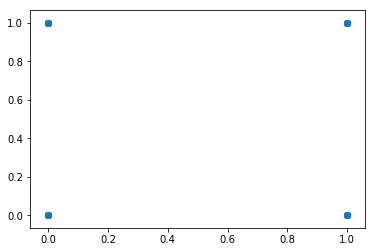

In [119]:
plt.scatter(data['Gender'],data['Purchased'])
plt.show()

In [14]:
l1=list(data["Age"])
print(list(l1).count(22))

5
